This is a data set with Home Equity loans. The goal is to determine who will default on a loan. The target, “BAD” indicates if the loan is BAD or GOOD. If the value is “1” then the person defaulted (BAD LOAN). If the value is 0, then they did not (GOOD LOAN). The rest of the variables can be used to predict the target values. The input (independent) variables can be numeric or categorical. They might have missing values and they might have outliers.

PROBLEM 
> Determine the probability of Loan Default.

STEPS
>
* Read in the data
* Handle missing values and outliers
* Feel free to derive new variables
* Explore the data using statistics and graphs. 
* Comment on predictors of loan default
* Develop one or more predictive models to predict loan default.
* Validate if the model is good
* What variables are important to loan default


# Variable Definition

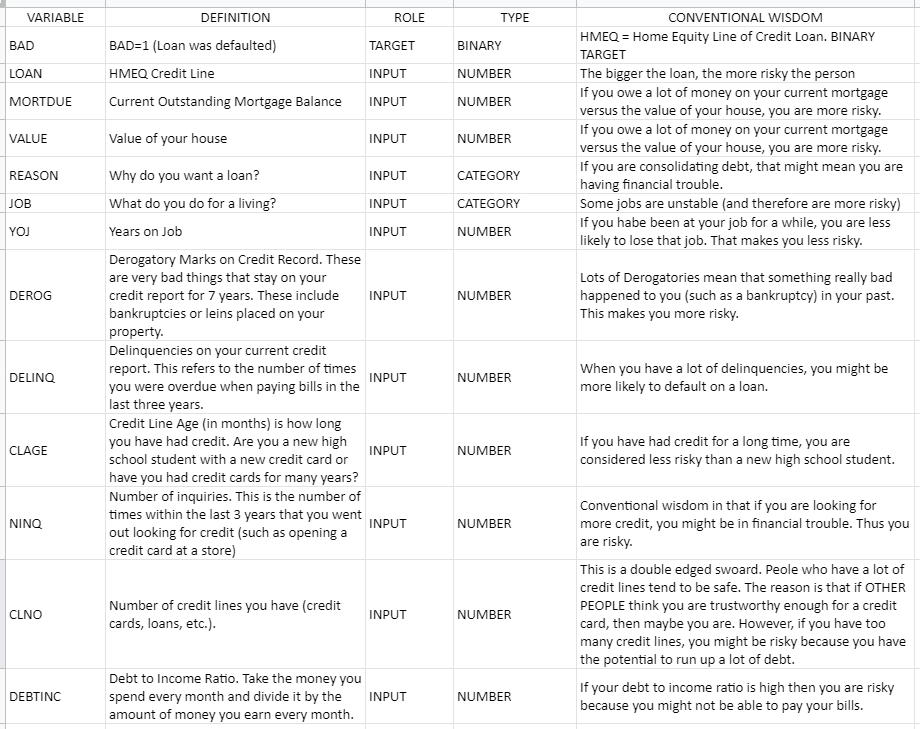

In [ ]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
fname = '/content/drive/My Drive/Test/HMEQ/HMEQ.csv'

HMEQ =  pd.read_csv(fname)

# Functions

In [ ]:
def boxPlot(data):
  fig, ax = plt.subplots(figsize = (10, 8))
  sns.boxplot(x = data)
  return

# Data Cleaning and Preprocessing

In [ ]:
dupes = HMEQ.duplicated()
print("# of duplicated data : ", sum(dupes))

# of duplicated data :  0


In [ ]:
HMEQ

BAD   LOAN  MORTDUE     VALUE  ...       CLAGE NINQ  CLNO    DEBTINC
0       1   1100  25860.0   39025.0  ...   94.366667  1.0   9.0        NaN
1       1   1300  70053.0   68400.0  ...  121.833333  0.0  14.0        NaN
2       1   1500  13500.0   16700.0  ...  149.466667  1.0  10.0        NaN
3       1   1500      NaN       NaN  ...         NaN  NaN   NaN        NaN
4       0   1700  97800.0  112000.0  ...   93.333333  0.0  14.0        NaN
...   ...    ...      ...       ...  ...         ...  ...   ...        ...
5955    0  88900  57264.0   90185.0  ...  221.808718  0.0  16.0  36.112347
5956    0  89000  54576.0   92937.0  ...  208.692070  0.0  15.0  35.859971
5957    0  89200  54045.0   92924.0  ...  212.279697  0.0  15.0  35.556590
5958    0  89800  50370.0   91861.0  ...  213.892709  0.0  16.0  34.340882
5959    0  89900  48811.0   88934.0  ...  219.601002  0.0  16.0  34.571519

[5960 rows x 13 columns]

In [ ]:
HMEQ.describe()

BAD          LOAN  ...         CLNO      DEBTINC
count  5960.000000   5960.000000  ...  5738.000000  4693.000000
mean      0.199497  18607.969799  ...    21.296096    33.779915
std       0.399656  11207.480417  ...    10.138933     8.601746
min       0.000000   1100.000000  ...     0.000000     0.524499
25%       0.000000  11100.000000  ...    15.000000    29.140031
50%       0.000000  16300.000000  ...    20.000000    34.818262
75%       0.000000  23300.000000  ...    26.000000    39.003141
max       1.000000  89900.000000  ...    71.000000   203.312149

[8 rows x 11 columns]

In [ ]:
HMEQ.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
# NA percentage
(HMEQ.isna().sum() / HMEQ.shape[0] *100)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [ ]:
HMEQ1 = HMEQ.copy()

In [ ]:
HMEQ1[HMEQ1.isnull().any(axis=1)]


BAD   LOAN  MORTDUE     VALUE  ...       CLAGE NINQ  CLNO    DEBTINC
0       1   1100  25860.0   39025.0  ...   94.366667  1.0   9.0        NaN
1       1   1300  70053.0   68400.0  ...  121.833333  0.0  14.0        NaN
2       1   1500  13500.0   16700.0  ...  149.466667  1.0  10.0        NaN
3       1   1500      NaN       NaN  ...         NaN  NaN   NaN        NaN
4       0   1700  97800.0  112000.0  ...   93.333333  0.0  14.0        NaN
...   ...    ...      ...       ...  ...         ...  ...   ...        ...
5944    0  81400  22344.0  108280.0  ...  148.114994  0.0  14.0  34.285741
5945    0  81400  21041.0  111304.0  ...  146.322783  0.0  14.0  32.131373
5946    0  82200  16097.0  111287.0  ...  142.119979  0.0  14.0  31.743472
5947    0  82200  23197.0  110481.0  ...  127.767588  0.0  14.0  30.942695
5948    0  86000  47355.0   85000.0  ...  210.966667  0.0  16.0        NaN

[2596 rows x 13 columns]

In [ ]:
HMEQ1.isna().sum(axis=1).value_counts().sort_index()

0     3364
1     1589
2      449
3      219
4       64
5       83
6       66
7       25
8       39
9       49
10      11
11       2
dtype: int64

In [ ]:
pd.options.display.max_rows = 300
HMEQ1[HMEQ1.isna().sum(axis=1) == 11]

BAD   LOAN  MORTDUE  VALUE REASON  ... DELINQ  CLAGE  NINQ  CLNO  DEBTINC
3       1   1500      NaN    NaN    NaN  ...    NaN    NaN   NaN   NaN      NaN
1405    0  10800      NaN    NaN    NaN  ...    NaN    NaN   NaN   NaN      NaN

[2 rows x 13 columns]

In [ ]:
HMEQ1[HMEQ1.isna().sum(axis=1) == 10]


BAD   LOAN  MORTDUE     VALUE  ... CLAGE NINQ  CLNO    DEBTINC
51      0   3100      NaN   70400.0  ...   NaN  NaN   NaN        NaN
112     0   4400      NaN   60250.0  ...   NaN  NaN   NaN        NaN
333     0   6100      NaN   47400.0  ...   NaN  NaN   NaN        NaN
608     0   7700      NaN   67350.0  ...   NaN  NaN   NaN        NaN
1507    0  11100      NaN       NaN  ...   NaN  NaN   NaN  26.232459
1897    0  12500      NaN       NaN  ...   NaN  NaN   NaN  27.352644
1959    0  12800      NaN       NaN  ...   NaN  NaN   NaN  25.132449
1960    0  12800      NaN       NaN  ...   NaN  NaN   NaN  24.659670
2303    0  14000      NaN       NaN  ...   NaN  NaN   NaN  25.689711
2449    0  14700      NaN       NaN  ...   NaN  NaN   NaN  24.595378
4321    0  22500      NaN  143254.0  ...   NaN  NaN   NaN        NaN

[11 rows x 13 columns]

In [ ]:
HMEQ1[HMEQ1.isna().sum(axis=1) == 9]


BAD   LOAN  MORTDUE     VALUE  ... CLAGE NINQ  CLNO    DEBTINC
10      1   2000  22608.0       NaN  ...   NaN  NaN   NaN        NaN
73      0   3800      NaN   73189.0  ...   NaN  NaN   NaN  22.253949
115     0   4500      NaN   77182.0  ...   NaN  NaN   NaN  25.227253
139     0   4900      NaN   28437.5  ...   NaN  NaN   NaN        NaN
143     0   4900      NaN   69706.0  ...   NaN  NaN   NaN  33.705588
237     0   5400      NaN   75254.0  ...   NaN  NaN   NaN  23.163743
268     0   5700      NaN   74685.0  ...   NaN  NaN   NaN  24.274865
284     0   5700      NaN   64910.0  ...   NaN  NaN   NaN  33.850461
302     0   5900      NaN   66903.0  ...   NaN  NaN   NaN  32.782927
304     0   6000      NaN   69492.0  ...   NaN  NaN   NaN  32.977197
352     0   6200      NaN   80078.0  ...   NaN  NaN   NaN  25.375544
358     0   6200      NaN   51732.0  ...   NaN  NaN   NaN  12.324707
413     0   6500      NaN   70886.0  ...   NaN  NaN   NaN  23.470881
424     0   6700      NaN   55396.0  ...   NaN  NaN   NaN  15.703992
464     0   6900      NaN   57067.0  ...   NaN  NaN   NaN  14.370986
489     0   7000   5768.0   26600.0  ...   NaN  NaN   NaN        NaN
566     0   7500      NaN   49804.0  ...   NaN  NaN   NaN  12.391235
644     0   7900      NaN   75462.0  ...   NaN  NaN   NaN  23.345022
716     0   8200      NaN   49362.0  ...   NaN  NaN   NaN  11.769692
817     0   8600      NaN   47791.0  ...   NaN  NaN   NaN  14.392536
829     0   8600      NaN   51703.0  ...   NaN  NaN   NaN  12.105144
881     0   8800      NaN   74928.0  ...   NaN  NaN   NaN  23.988913
934     0   9100      NaN   50391.0  ...   NaN  NaN   NaN  15.024706
946     0   9100      NaN   74450.0  ...   NaN  NaN   NaN  23.942517
1047    0   9600      NaN   56900.0  ...   NaN  NaN   NaN  14.435239
1137    0  10000      NaN   49266.0  ...   NaN  NaN   NaN  15.597290
1144    1  10000      NaN       NaN  ...   NaN  NaN   NaN        NaN
1209    0  10000      NaN   69502.0  ...   NaN  NaN   NaN  25.772783
1235    0  10100      NaN   69451.0  ...   NaN  NaN   NaN  22.519685
1426    0  10900      NaN   76207.0  ...   NaN  NaN   NaN  22.392612
1553    1  11300      NaN       NaN  ...   NaN  NaN   NaN        NaN
1555    0  11300      NaN   73121.0  ...   NaN  NaN   NaN  22.577246
1627    0  11700      NaN   69125.0  ...   NaN  NaN   NaN  23.766832
2061    0  13000  77355.0  114400.0  ...   NaN  NaN   NaN        NaN
2550    1  15000      NaN   74750.0  ...   NaN  NaN   NaN        NaN
3151    1  17000  52663.0   82000.0  ...   NaN  NaN   NaN        NaN
3622    0  19000  43074.0   75700.0  ...   NaN  NaN   NaN        NaN
3839    1  20100  54098.0   88939.0  ...   NaN  NaN   NaN        NaN
4343    0  22600      NaN  144841.0  ...   NaN  NaN   NaN  16.382391
4381    0  22800      NaN  147730.0  ...   NaN  NaN   NaN  16.179250
4384    0  22800      NaN  146840.0  ...   NaN  NaN   NaN  14.800087
4392    0  22900      NaN  148018.0  ...   NaN  NaN   NaN  15.938058
4418    0  23000      NaN  150364.0  ...   NaN  NaN   NaN  17.125660
4581    0  23900      NaN  151738.0  ...   NaN  NaN   NaN  16.426395
4632    0  24300      NaN  144123.0  ...   NaN  NaN   NaN  15.529230
4660    0  24500      NaN  149489.0  ...   NaN  NaN   NaN  15.443486
4680    0  24600      NaN  146804.0  ...   NaN  NaN   NaN  17.263535
4880    0  25600      NaN  147598.0  ...   NaN  NaN   NaN  14.461987
4947    0  26100      NaN  151429.0  ...   NaN  NaN   NaN  15.567001

[49 rows x 13 columns]

In [ ]:
HMEQ1[HMEQ1.isna().sum(axis=1) == 8]


BAD   LOAN  MORTDUE     VALUE  ... CLAGE NINQ  CLNO    DEBTINC
17      1   2200  23030.0       NaN  ...   NaN  NaN   NaN   3.711312
144     0   5000      NaN   34846.0  ...   NaN  NaN   NaN  33.354653
241     0   5500      NaN   35402.0  ...   NaN  NaN   NaN  35.272074
245     1   5500      NaN   43132.0  ...   NaN  NaN   NaN        NaN
292     0   5800      NaN   34704.0  ...   NaN  NaN   NaN  34.174056
346     0   6200      NaN   33909.0  ...   NaN  NaN   NaN  34.517405
603     0   7700  14776.0   32287.0  ...   NaN  NaN   NaN  34.880462
702     0   8100  13179.0   32981.0  ...   NaN  NaN   NaN  31.742249
811     0   8500   6424.0   32365.0  ...   NaN  NaN   NaN  33.904465
853     0   8700      NaN   32855.0  ...   NaN  NaN   NaN  35.937903
932     0   9000  12340.0   36133.0  ...   NaN  NaN   NaN  31.703815
1237    0  10200   9078.0   35261.0  ...   NaN  NaN   NaN  33.666455
1332    0  10500  12630.0   32220.0  ...   NaN  NaN   NaN  34.345860
2072    1  13100      NaN       NaN  ...   NaN  NaN   NaN        NaN
2107    0  13300  80059.0  121790.0  ...   NaN  NaN   NaN  34.561831
2308    1  14000  67881.0   93390.0  ...   NaN  NaN   NaN        NaN
2309    1  14000      NaN   42500.0  ...   NaN  NaN   NaN        NaN
2378    0  14300  80299.0  123339.0  ...   NaN  NaN   NaN  35.311171
2439    0  14600  82051.0  118505.0  ...   NaN  NaN   NaN  35.890562
2463    0  14700  82967.0  114835.0  ...   NaN  NaN   NaN  34.478074
2472    1  14800      NaN       NaN  ...   NaN  NaN   NaN        NaN
2689    0  15300  83004.0  121108.0  ...   NaN  NaN   NaN  36.823393
2813    0  15700  83830.0  122719.0  ...   NaN  NaN   NaN  35.165146
2987    0  16400  86623.0  124048.0  ...   NaN  NaN   NaN  35.810769
3005    0  16400  86422.0  116097.0  ...   NaN  NaN   NaN  35.598951
3046    0  16600  77380.0  123638.0  ...   NaN  NaN   NaN  34.118615
3124    0  16900  78455.0  121450.0  ...   NaN  NaN   NaN  33.742375
3600    1  18900      NaN   75252.0  ...   NaN  NaN   NaN  42.919605
3682    0  19400  45036.0   78900.0  ...   NaN  NaN   NaN  40.023968
3696    0  19500  51333.0   77732.0  ...   NaN  NaN   NaN  37.398317
3736    0  19800  47488.0   77916.0  ...   NaN  NaN   NaN  37.308247
3746    0  19900  45748.0   82516.0  ...   NaN  NaN   NaN  39.313878
3761    0  20000  99000.0  140000.0  ...   NaN  NaN   NaN        NaN
3843    0  20100  45764.0   79967.0  ...   NaN  NaN   NaN  38.647728
3954    0  20700  48134.0   78954.0  ...   NaN  NaN   NaN  37.760482
4035    0  21100  48624.0   83448.0  ...   NaN  NaN   NaN  39.671408
4096    0  21400  44573.0   80915.0  ...   NaN  NaN   NaN  37.827219
4122    0  21500  47451.0   78645.0  ...   NaN  NaN   NaN  38.468332
4386    0  22800  52760.0   81362.0  ...   NaN  NaN   NaN  38.024677

[39 rows x 13 columns]

In [ ]:
HMEQ1[HMEQ1.isna().sum(axis=1) == 7]


BAD   LOAN   MORTDUE     VALUE  ... CLAGE NINQ  CLNO    DEBTINC
164     1   5000       NaN   74500.0  ...   NaN  NaN   NaN        NaN
165     1   5000       NaN   94119.0  ...   NaN  NaN   NaN        NaN
171     0   5000   70470.0   77908.0  ...   NaN  NaN   NaN        NaN
330     1   6000       NaN   43683.0  ...   NaN  NaN   NaN  21.935499
747     1   8300       NaN   47244.0  ...   NaN  NaN   NaN        NaN
867     1   8800   12750.0       NaN  ...   NaN  NaN   NaN        NaN
1156    0  10000   31000.0   58240.0  ...   NaN  NaN   NaN        NaN
1181    1  10000   59929.0       NaN  ...   NaN  NaN   NaN        NaN
1320    1  10500       NaN   18600.0  ...   NaN  NaN   NaN        NaN
1735    1  12000       NaN   87000.0  ...   NaN  NaN   NaN        NaN
2266    0  13900   57700.0   74350.0  ...   NaN  NaN   NaN        NaN
2354    1  14200       NaN   49060.0  ...   NaN  NaN   NaN  24.701642
2517    1  15000       NaN   54869.0  ...   NaN  NaN   NaN        NaN
3768    1  20000   27900.0       NaN  ...   NaN  NaN   NaN        NaN
3827    0  20000  105422.0  146613.0  ...   NaN  NaN   NaN  38.039855
3952    0  20700  100778.0  142271.0  ...   NaN  NaN   NaN  39.983096
4016    1  21000       NaN   55000.0  ...   NaN  NaN   NaN        NaN
4072    0  21300   99613.0  147991.0  ...   NaN  NaN   NaN  38.497561
4141    0  21600  106308.0  147378.0  ...   NaN  NaN   NaN  39.137645
4199    0  21900  104379.0  144850.0  ...   NaN  NaN   NaN  38.010734
4241    0  22100   84114.0   97775.0  ...   NaN  NaN   NaN        NaN
4273    1  22300       NaN  135000.0  ...   NaN  NaN   NaN        NaN
4280    0  22300  101738.0  145709.0  ...   NaN  NaN   NaN  38.719966
4548    0  23700  104752.0  143913.0  ...   NaN  NaN   NaN  36.761014
4572    1  23900       NaN  105700.0  ...   NaN  NaN   NaN        NaN

[25 rows x 13 columns]

In [ ]:
HMEQ1[HMEQ1.isna().sum(axis=1) == 6]


BAD   LOAN    MORTDUE     VALUE  ...       CLAGE NINQ  CLNO    DEBTINC
63      1   3600   61584.00   61800.0  ...         NaN  NaN   NaN        NaN
152     1   5000   31000.00   47350.0  ...         NaN  NaN   NaN        NaN
154     1   5000  100000.00  129693.5  ...         NaN  NaN   NaN        NaN
159     1   5000  123000.00  157500.0  ...         NaN  NaN   NaN        NaN
173     0   5000   74225.00   89640.0  ...         NaN  NaN   NaN        NaN
217     0   5300   73698.00   84427.0  ...         NaN  NaN   NaN  19.131201
251     0   5500   78059.00   78179.0  ...         NaN  NaN   NaN  20.679314
322     0   6000        NaN   43300.0  ...  100.933333  NaN   9.0        NaN
336     0   6100        NaN   35250.0  ...  303.000000  NaN  12.0        NaN
380     0   6400   76577.00   83200.0  ...         NaN  NaN   NaN  22.055034
417     0   6600   74376.00   84855.0  ...         NaN  NaN   NaN  20.028354
431     1   6700        NaN   81239.0  ...         NaN  NaN   NaN  40.894932
443     0   6800   78292.00   86959.0  ...         NaN  NaN   NaN  18.927212
481     1   7000   27290.00   63500.0  ...         NaN  NaN   NaN        NaN
502     1   7000        NaN   96783.0  ...         NaN  NaN   NaN  40.730315
531     0   7200   71509.00   86484.0  ...         NaN  NaN   NaN  20.099050
535     1   7300   28500.00   42050.0  ...         NaN  NaN   NaN        NaN
536     1   7300   60971.32   77375.0  ...         NaN  NaN   NaN        NaN
596     0   7600   77518.00   83727.0  ...         NaN  NaN   NaN  22.655140
633     1   7900  126919.00  166566.0  ...         NaN  NaN   NaN        NaN
668     0   8000   79200.00  116500.0  ...         NaN  NaN   NaN        NaN
979     0   9300   21138.00   30700.0  ...         NaN  NaN   NaN        NaN
1256    0  10200   38223.00   60728.0  ...         NaN  NaN   NaN  35.347854
1335    0  10600   37742.00   64334.0  ...         NaN  NaN   NaN  37.541258
1394    0  10800   32870.00   61572.0  ...         NaN  NaN   NaN  38.490247
1401    0  10800   31149.00   67239.0  ...         NaN  NaN   NaN  35.265437
1467    1  11000   41000.00   63450.0  ...         NaN  NaN   NaN        NaN
1588    1  11500   67000.00   83000.0  ...         NaN  NaN   NaN        NaN
1634    0  11700   37093.00   62116.0  ...         NaN  NaN   NaN  37.010949
1687    1  11900   63833.00       NaN  ...         NaN  NaN   NaN  40.932767
1966    1  12800   51800.00   68000.0  ...         NaN  NaN   NaN        NaN
2066    0  13000   40996.00   58938.0  ...         NaN  NaN   NaN  35.809613
2120    0  13300   38232.00   59482.0  ...         NaN  NaN   NaN  36.027104
2165    0  13500   40023.00   67357.0  ...         NaN  NaN   NaN  38.319426
2167    0  13500   40786.00   66872.0  ...         NaN  NaN   NaN  35.364140
2217    0  13700   38981.00   67536.0  ...         NaN  NaN   NaN  35.188160
2296    0  13900   63831.00   81378.0  ...         NaN  NaN   NaN  24.371050
2341    0  14100   65994.00   80037.0  ...         NaN  NaN   NaN  27.735204
2356    0  14200   64235.00   76965.0  ...         NaN  NaN   NaN  24.835958
2416    0  14500   59465.00   78444.0  ...         NaN  NaN   NaN  24.539946
2426    0  14600   59658.00   80384.0  ...         NaN  NaN   NaN  25.192869
2475    0  14800        NaN   43475.0  ...  339.700000  NaN  17.0        NaN
2514    0  14900   60667.00   81293.0  ...         NaN  NaN   NaN  27.573737
2542    1  15000   57900.00   88200.0  ...         NaN  NaN   NaN        NaN
2635    1  15100        NaN       NaN  ...         NaN  0.0   0.0        NaN
2679    0  15200   59745.00   81269.0  ...         NaN  NaN   NaN  26.985581
2751    1  15500   48100.00   67000.0  ...         NaN  NaN   NaN        NaN
2983    0  16400   62786.00   79154.0  ...         NaN  NaN   NaN  24.838940
3140    0  17000   66894.00   75360.0  ...         NaN  NaN   NaN  25.260099
3672    1  19300  152000.00  182000.0  ...         NaN  NaN   NaN        NaN
3767    1  20000   71254.00  109200.0  ...         NaN  NaN   NaN        NaN
43

In [ ]:
HMEQ1[HMEQ1.isna().sum(axis=1) == 5]


BAD   LOAN   MORTDUE     VALUE  ...       CLAGE NINQ  CLNO    DEBTINC
226     0   5300   83552.0   96809.0  ...         NaN  NaN   NaN  28.423962
299     0   5900   82912.0   91175.0  ...         NaN  NaN   NaN  27.595274
309     1   6000       NaN       NaN  ...  122.766667  NaN  23.0        NaN
342     0   6100   78753.0   95433.0  ...         NaN  NaN   NaN  28.925117
343     0   6100   77265.0   97944.0  ...         NaN  NaN   NaN  28.876463
350     0   6200       NaN   41657.0  ...  293.958724  NaN  11.0  30.197631
351     1   6200       NaN       NaN  ...   80.500000  2.0  17.0        NaN
357     0   6200   75121.0   96462.0  ...         NaN  NaN   NaN  27.167656
366     0   6300       NaN   39050.0  ...  294.478048  NaN  12.0  31.447750
374     0   6300   79667.0   96988.0  ...         NaN  NaN   NaN  29.835961
396     0   6500       NaN   37448.0  ...  333.230900  NaN  11.0  29.011981
398     0   6500   80739.0   97630.0  ...         NaN  NaN   NaN  30.531265
401     0   6500   78741.0   90599.0  ...         NaN  NaN   NaN  29.198861
468     0   6900       NaN   36191.0  ...  311.869899  NaN  12.0  30.790621
472     0   7000       NaN   47462.0  ...  102.657327  NaN   9.0  36.094071
526     0   7200       NaN   38061.0  ...  299.752726  NaN  12.0  31.880033
544     0   7400   75311.0   89905.0  ...         NaN  NaN   NaN  27.202000
549     0   7400   75547.0   93839.0  ...         NaN  NaN   NaN  28.161832
572     1   7500       NaN       NaN  ...  158.900000  1.0  21.0        NaN
589     1   7500       NaN       NaN  ...  157.328423  0.0  20.0        NaN
642     0   7900       NaN   37125.0  ...  285.111015  NaN  12.0  29.413550
653     0   8000   75690.0   96517.0  ...         NaN  NaN   NaN  27.336157
687     0   8000   84730.0  123455.0  ...         NaN  NaN   NaN  40.032649
725     0   8200       NaN   38648.0  ...  302.530182  NaN  10.0  30.445376
734     0   8200   75870.0   97922.0  ...         NaN  NaN   NaN  27.276365
736     0   8200   79751.0  125413.0  ...         NaN  NaN   NaN  41.985557
748     0   8300       NaN   41438.0  ...  302.856633  NaN  12.0  30.104071
764     0   8400   82972.0  121796.0  ...         NaN  NaN   NaN  41.445624
771     0   8400   80490.0   93028.0  ...         NaN  NaN   NaN  29.473761
777     0   8400   84666.0  123613.0  ...         NaN  NaN   NaN  39.658320
782     0   8400   77916.0   93589.0  ...         NaN  NaN   NaN  27.873871
785     0   8400   85136.0  125912.0  ...         NaN  NaN   NaN  40.715178
857     0   8700   76008.0   95976.0  ...         NaN  NaN   NaN  30.022245
898     0   8900       NaN   49147.0  ...  110.509581  NaN   8.0  37.108142
928     1   9000   32539.0   65440.0  ...         NaN  NaN   NaN  42.368944
969     0   9300       NaN   45906.0  ...   92.821714  NaN   9.0  36.141276
973     0   9300       NaN   36793.0  ...  304.520189  NaN  11.0  30.738814
986     0   9300       NaN   44108.0  ...  290.818074  NaN  12.0  29.743600
987     0   9300   21979.0   39880.0  ...         NaN  NaN   NaN  38.844089
991     0   9400       NaN   50575.0  ...   99.069518  NaN   8.0  35.907815
1093    0   9800       NaN   45197.0  ...  316.525303  NaN  11.0  29.646666
1154    0  10000       NaN   42497.0  ...  165.433333  NaN   9.0        NaN
1295    0  10400   21235.0   40116.0  ...         NaN  NaN   NaN  36.905414
1338    0  10600   82894.0  124359.0  ...         NaN  NaN   NaN  40.325885
1421    0  10800   89139.0  122571.0  ...         NaN  NaN   NaN  40.780527
1433    0  10900   25061.0   35792.0  ...         NaN  NaN   NaN  37.104712
1674    0  11900   85179.0  122788.0  ...         NaN  NaN   NaN  39.430731
1694    0  12000   83560.0  126479.0  ...         NaN  NaN   NaN  38.928316
1724    0  12000       NaN   63000.0  ...         NaN  0.0   0.0        NaN
1789    0  12100   28193.0   34705.0  ...         NaN  NaN   NaN  37.618027
1841    1  12300   73099.0   84250.0  ...         NaN  NaN   NaN  40.222283
1863    0  12400   25805.0   31414.0  ...         NaN 

In [ ]:
HMEQ1[HMEQ1.isna().sum(axis=1) == 4]


BAD   LOAN   MORTDUE     VALUE  ...       CLAGE  NINQ  CLNO    DEBTINC
92      0   4000       NaN   45760.0  ...         NaN   0.0   0.0        NaN
105     0   4200   44000.0   55085.0  ...   75.433333   NaN  16.0        NaN
119     1   4500   57000.0       NaN  ...  222.600000   1.0  13.0        NaN
169     0   5000   39000.0   50340.0  ...  179.833333   NaN  19.0        NaN
665     0   8000       NaN   34226.0  ...   75.366667   1.0  10.0        NaN
921     0   9000   50400.0   65000.0  ...  117.600000   NaN  24.0        NaN
1152    0  10000   63005.0   78500.0  ...  171.766667   NaN  35.0        NaN
1198    1  10000       NaN       NaN  ...  108.933333   3.0  31.0        NaN
1275    0  10300       NaN   50548.0  ...  165.553199   NaN   9.0  23.886331
1416    0  10800       NaN   49495.0  ...  141.165298   NaN   8.0  21.079999
1488    0  11100       NaN   50262.0  ...  175.756887   NaN   8.0  22.956864
1531    0  11200       NaN   48150.0  ...  165.768017   NaN   9.0  22.302234
1567    0  11400       NaN   44849.0  ...  163.274595   NaN   9.0  23.481117
1780    0  12100       NaN   72731.0  ...         NaN   0.0   0.0   0.720295
1823    0  12300       NaN   50530.0  ...  163.540960   NaN   9.0  20.026284
1855    0  12400       NaN   69350.0  ...         NaN   0.0   0.0   2.365195
1877    0  12500       NaN   52026.0  ...  173.717239   NaN   8.0  21.621195
2043    0  13000       NaN   25425.0  ...   90.933333   2.0   9.0        NaN
2078    0  13100       NaN   65933.0  ...         NaN   0.0   0.0   3.657371
2088    0  13200       NaN   69139.0  ...         NaN   0.0   1.0   1.565931
2113    0  13300       NaN   72583.0  ...         NaN   0.0   0.0   3.720421
2192    0  13600       NaN   71904.0  ...         NaN   0.0   0.0   3.265083
2245    0  13800       NaN   44459.0  ...  169.005410   NaN   9.0  21.532897
2265    0  13800       NaN   44092.0  ...  173.875868   NaN  10.0  20.682377
2306    0  14000       NaN   58407.0  ...  107.533333   0.0  15.0        NaN
2365    0  14300       NaN   63319.0  ...         NaN   0.0   0.0   3.960859
2387    0  14400       NaN   69712.0  ...         NaN   0.0   0.0   2.553522
2523    1  15000       NaN       NaN  ...  108.533333   0.0  22.0        NaN
2539    1  15000       NaN       NaN  ...   91.266667   1.0  10.0        NaN
2562    0  15000       NaN   94000.0  ...  186.700000   1.0  10.0        NaN
2588    1  15000   33000.0       NaN  ...  144.866667   0.0  20.0        NaN
2617    0  15000       NaN   68020.0  ...         NaN   0.0   0.0   1.920694
2633    0  15100       NaN   65961.0  ...         NaN   0.0   0.0   1.603508
2659    0  15200       NaN   67103.0  ...         NaN   0.0   0.0   3.688958
2969    0  16300   96431.0  161284.0  ...  256.371932   NaN  23.0  39.077814
3050    0  16600   97749.0  164103.0  ...  263.846777   NaN  23.0  37.386854
3135    0  17000   97713.0  164869.0  ...  253.476317   NaN  23.0  36.452296
3156    0  17000   86000.0  119600.0  ...  137.466667   NaN  25.0        NaN
3196    0  17100  104652.0  169076.0  ...  270.581214   NaN  23.0  38.465228
3350    0  17800  100277.0  163702.0  ...  256.854471   NaN  24.0  36.354036
3365    0  17900   97335.0  167384.0  ...  250.487108   NaN  24.0  39.156323
3391    0  18000   23000.0   46000.0  ...  312.533333   NaN  25.0        NaN
3555    0  18700   99003.0  162566.0  ...  252.263799   NaN  23.0  39.209039
3581    0  18800  102120.0  165302.0  ...  274.112926   NaN  24.0  40.105030
3620    0  19000   57429.0   86250.0  ...  175.500000   NaN  16.0        NaN
3630    0  19000  104176.0  165086.0  ...  254.742480   NaN  24.0  39.613206
3651    0  19200  101641.0  160839.0  ...  260.834993   NaN  23.0  37.123604
4747    0  25000  127491.0  178453.0  ...  120.400000   NaN  39.0        NaN
4785    0  25000       NaN   35000.0  ...   88.933333   NaN  14.0        NaN
5313    0  29800   34000.0   71000.0  ...  115.666667   NaN  24.0        NaN
5324    0  30000   32657.0   76000.0  ...  288.333333   0.0  16.0        NaN
53

IF CLNO is missing, NINQ, CLAGE, DELINQ, DEROG are also missing

In [ ]:
HMEQ1[HMEQ1.CLNO.isna()]

BAD   LOAN    MORTDUE     VALUE  ... CLAGE NINQ  CLNO    DEBTINC
3       1   1500        NaN       NaN  ...   NaN  NaN   NaN        NaN
10      1   2000   22608.00       NaN  ...   NaN  NaN   NaN        NaN
17      1   2200   23030.00       NaN  ...   NaN  NaN   NaN   3.711312
51      0   3100        NaN   70400.0  ...   NaN  NaN   NaN        NaN
63      1   3600   61584.00   61800.0  ...   NaN  NaN   NaN        NaN
73      0   3800        NaN   73189.0  ...   NaN  NaN   NaN  22.253949
112     0   4400        NaN   60250.0  ...   NaN  NaN   NaN        NaN
115     0   4500        NaN   77182.0  ...   NaN  NaN   NaN  25.227253
139     0   4900        NaN   28437.5  ...   NaN  NaN   NaN        NaN
143     0   4900        NaN   69706.0  ...   NaN  NaN   NaN  33.705588
144     0   5000        NaN   34846.0  ...   NaN  NaN   NaN  33.354653
152     1   5000   31000.00   47350.0  ...   NaN  NaN   NaN        NaN
154     1   5000  100000.00  129693.5  ...   NaN  NaN   NaN        NaN
159     1   5000  123000.00  157500.0  ...   NaN  NaN   NaN        NaN
164     1   5000        NaN   74500.0  ...   NaN  NaN   NaN        NaN
165     1   5000        NaN   94119.0  ...   NaN  NaN   NaN        NaN
171     0   5000   70470.00   77908.0  ...   NaN  NaN   NaN        NaN
173     0   5000   74225.00   89640.0  ...   NaN  NaN   NaN        NaN
217     0   5300   73698.00   84427.0  ...   NaN  NaN   NaN  19.131201
226     0   5300   83552.00   96809.0  ...   NaN  NaN   NaN  28.423962
237     0   5400        NaN   75254.0  ...   NaN  NaN   NaN  23.163743
241     0   5500        NaN   35402.0  ...   NaN  NaN   NaN  35.272074
245     1   5500        NaN   43132.0  ...   NaN  NaN   NaN        NaN
251     0   5500   78059.00   78179.0  ...   NaN  NaN   NaN  20.679314
268     0   5700        NaN   74685.0  ...   NaN  NaN   NaN  24.274865
284     0   5700        NaN   64910.0  ...   NaN  NaN   NaN  33.850461
292     0   5800        NaN   34704.0  ...   NaN  NaN   NaN  34.174056
299     0   5900   82912.00   91175.0  ...   NaN  NaN   NaN  27.595274
302     0   5900        NaN   66903.0  ...   NaN  NaN   NaN  32.782927
304     0   6000        NaN   69492.0  ...   NaN  NaN   NaN  32.977197
330     1   6000        NaN   43683.0  ...   NaN  NaN   NaN  21.935499
333     0   6100        NaN   47400.0  ...   NaN  NaN   NaN        NaN
342     0   6100   78753.00   95433.0  ...   NaN  NaN   NaN  28.925117
343     0   6100   77265.00   97944.0  ...   NaN  NaN   NaN  28.876463
346     0   6200        NaN   33909.0  ...   NaN  NaN   NaN  34.517405
352     0   6200        NaN   80078.0  ...   NaN  NaN   NaN  25.375544
357     0   6200   75121.00   96462.0  ...   NaN  NaN   NaN  27.167656
358     0   6200        NaN   51732.0  ...   NaN  NaN   NaN  12.324707
374     0   6300   79667.00   96988.0  ...   NaN  NaN   NaN  29.835961
380     0   6400   76577.00   83200.0  ...   NaN  NaN   NaN  22.055034
398     0   6500   80739.00   97630.0  ...   NaN  NaN   NaN  30.531265
401     0   6500   78741.00   90599.0  ...   NaN  NaN   NaN  29.198861
413     0   6500        NaN   70886.0  ...   NaN  NaN   NaN  23.470881
417     0   6600   74376.00   84855.0  ...   NaN  NaN   NaN  20.028354
424     0   6700        NaN   55396.0  ...   NaN  NaN   NaN  15.703992
431     1   6700        NaN   81239.0  ...   NaN  NaN   NaN  40.894932
443     0   6800   78292.00   86959.0  ...   NaN  NaN   NaN  18.927212
464     0   6900        NaN   57067.0  ...   NaN  NaN   NaN  14.370986
481     1   7000   27290.00   63500.0  ...   NaN  NaN   NaN        NaN
489     0   7000    5768.00   26600.0  ...   NaN  NaN   NaN        NaN
502     1   7000        NaN   96783.0  ...   NaN  NaN   NaN  40.730315
531     0   7200   71509.00   86484.0  ...   NaN  NaN   NaN  20.099050
535     1   7300   28500.00   42050.0  ...   NaN  NaN   NaN        NaN
536     1   7300   60971.32   77375.0  ...   NaN  NaN   NaN        NaN
544     0   7400   75311.00   89905.0  ...   NaN  NaN   NaN  27.202000
549     0   7400   75547.00   

In [ ]:
HMEQ1[HMEQ1.CLNO.isna()].shape

(222, 13)

In [ ]:
HMEQ1[HMEQ1.CLNO.isna()].isna().sum()

BAD          0
LOAN         0
MORTDUE     81
VALUE       18
REASON      85
JOB        132
YOJ        117
DEROG      222
DELINQ     222
CLAGE      222
NINQ       222
CLNO       222
DEBTINC     58
dtype: int64

In [ ]:
HMEQ1 = HMEQ1[HMEQ1.CLNO.notna()]

In [ ]:
HMEQ1.shape

(5738, 13)

In [ ]:
HMEQ1.isna().sum()

BAD           0
LOAN          0
MORTDUE     437
VALUE        94
REASON      167
JOB         147
YOJ         398
DEROG       486
DELINQ      358
CLAGE        86
NINQ        288
CLNO          0
DEBTINC    1209
dtype: int64

In [ ]:
HMEQ1.isna().sum(axis=1).value_counts().sort_index()

0    3364
1    1589
2     449
3     219
4      64
5      48
6       5
dtype: int64

In [ ]:
# Impute missing values

scalar = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DEBTINC']
categorical = ['BAD', 'REASON', 'JOB', 'DEROG', 'DELINQ', 'NINQ', 'CLNO']

numerical_data = HMEQ1[scalar]
categorical_data = HMEQ1[categorical]

for col in numerical_data.columns:
  numerical_data[col] = numerical_data[col].fillna(numerical_data[col].mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
numerical_data.isna().sum()

LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
CLAGE      0
DEBTINC    0
dtype: int64

In [ ]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5738 entries, 0 to 5959
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BAD     5738 non-null   int64  
 1   REASON  5571 non-null   object 
 2   JOB     5591 non-null   object 
 3   DEROG   5252 non-null   float64
 4   DELINQ  5380 non-null   float64
 5   NINQ    5450 non-null   float64
 6   CLNO    5738 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 358.6+ KB


In [ ]:
for col in categorical_data.columns:
  categorical_data[col] = categorical_data[col].astype('object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5738 entries, 0 to 5959
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BAD     5738 non-null   object
 1   REASON  5571 non-null   object
 2   JOB     5591 non-null   object
 3   DEROG   5252 non-null   object
 4   DELINQ  5380 non-null   object
 5   NINQ    5450 non-null   object
 6   CLNO    5738 non-null   object
dtypes: object(7)
memory usage: 358.6+ KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder 
encoder = OrdinalEncoder()
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in categorical_data.columns:
    encode(categorical_data[columns])

In [ ]:
from fancyimpute import KNN
imputer = KNN()

categorical_data = pd.DataFrame(np.round(imputer.fit_transform(categorical_data)),columns = categorical_data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Imputing row 1/5738 with 0 missing, elapsed time: 5.269
Imputing row 101/5738 with 0 missing, elapsed time: 5.271
Imputing row 201/5738 with 0 missing, elapsed time: 5.273
Imputing row 301/5738 with 0 missing, elapsed time: 5.275
Imputing row 401/5738 with 0 missing, elapsed time: 5.278
Imputing row 501/5738 with 0 missing, elapsed time: 5.279
Imputing row 601/5738 with 0 missing, elapsed time: 5.281
Imputing row 701/5738 with 0 missing, elapsed time: 5.283
Imputing row 801/5738 with 0 missing, elapsed time: 5.285
Imputing row 901/5738 with 0 missing, elapsed time: 5.287
Imputing row 1001/5738 with 0 missing, elapsed time: 5.289
Imputing row 1101/5738 with 0 missing, elapsed time: 5.290
Imputing row 1201/5738 with 0 missing, elapsed time: 5.292
Imputing row 1301/5738 with 0 missing, elapsed time: 5.294
Imputing row 1401/5738 with 0 missing, elapsed time: 5.295
Imputing row 1501/5738 with 1 missing, elapsed time: 5.297
Imputing row 1601/5738 with 1 missing, elapsed time: 5.298
Imputing 

In [ ]:
categorical_data.isna().sum()

BAD       0
REASON    0
JOB       0
DEROG     0
DELINQ    0
NINQ      0
CLNO      0
dtype: int64

DETECTING OUTLIERS

[Text(0, 0, 'LOAN'),
 Text(0, 0, 'MORTDUE'),
 Text(0, 0, 'VALUE'),
 Text(0, 0, 'YOJ'),
 Text(0, 0, 'CLAGE'),
 Text(0, 0, 'DEBTINC')]

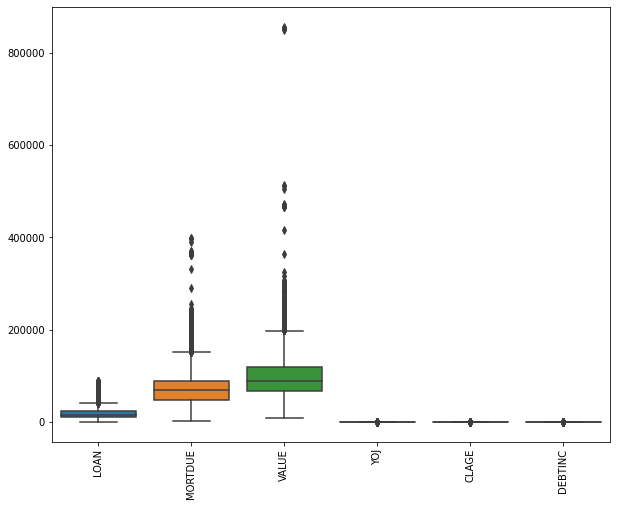

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot( data = numerical_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scaled_array = scalar.fit_transform(numerical_data)

In [ ]:
scaled_data = pd.DataFrame(scaled_array, columns = numerical_data.columns)

In [ ]:
scaled_data.describe()

LOAN       MORTDUE  ...         CLAGE       DEBTINC
count  5.738000e+03  5.738000e+03  ...  5.738000e+03  5.738000e+03
mean  -2.793939e-16  6.134476e-16  ... -7.667853e-17 -7.281582e-16
std    1.000087e+00  1.000087e+00  ...  1.000087e+00  1.000087e+00
min   -1.570649e+00 -1.671871e+00  ... -2.110996e+00 -4.387080e+00
25%   -6.672902e-01 -6.038808e-01  ... -7.516853e-01 -3.908716e-01
50%   -2.067546e-01 -1.187976e-01  ... -6.129272e-02  9.331728e-15
75%    4.131973e-01  3.535877e-01  ...  5.929546e-01  5.345437e-01
max    6.293884e+00  7.567950e+00  ...  1.160758e+01  2.224551e+01

[8 rows x 6 columns]

[Text(0, 0, 'LOAN'),
 Text(0, 0, 'MORTDUE'),
 Text(0, 0, 'VALUE'),
 Text(0, 0, 'YOJ'),
 Text(0, 0, 'CLAGE'),
 Text(0, 0, 'DEBTINC')]

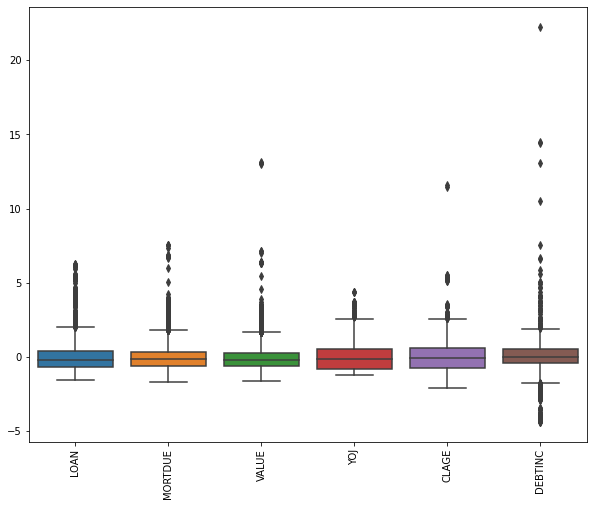

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
bp = sns.boxplot( data = scaled_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [ ]:
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

LOAN       12200.000000
MORTDUE    41189.250000
VALUE      52839.250000
YOJ           10.000000
CLAGE        114.505605
DEBTINC        7.046360
dtype: float64


In [ ]:
# Remove outliers

outliers_removed_data = numerical_data[ ~ ((numerical_data < (Q1 - 1.5 * IQR)) \
                                        | (numerical_data > (Q3 + 1.5 * IQR))).any(axis =1)]

In [ ]:
outliers_removed_data

LOAN       MORTDUE     VALUE        YOJ       CLAGE    DEBTINC
0      1100  25860.000000   39025.0  10.500000   94.366667  33.928901
1      1300  70053.000000   68400.0   7.000000  121.833333  33.928901
2      1500  13500.000000   16700.0   4.000000  149.466667  33.928901
4      1700  97800.000000  112000.0   3.000000   93.333333  33.928901
5      1700  30548.000000   40320.0   9.000000  101.466002  37.113614
...     ...           ...       ...        ...         ...        ...
5699  41500  97536.000000  158739.0  13.000000  212.774435  42.301907
5700  41600  73985.044309   48319.0   8.967228  113.798907  29.041253
5701  41600  73985.044309   53078.0   8.967228  108.870117  26.989440
5703  41600  73985.044309   44157.0   8.967228  202.151546  34.908632
5704  41700  59889.000000  109250.0  16.000000  187.132811  36.968814

[4796 rows x 6 columns]

[Text(0, 0, 'LOAN'),
 Text(0, 0, 'MORTDUE'),
 Text(0, 0, 'VALUE'),
 Text(0, 0, 'YOJ'),
 Text(0, 0, 'CLAGE'),
 Text(0, 0, 'DEBTINC')]

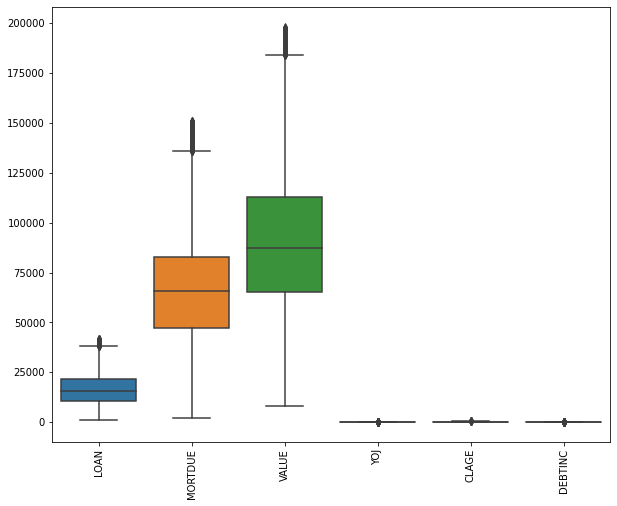

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot( data = outliers_removed_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [ ]:
scaled_data = scaled_data.reset_index()
categorical_data = categorical_data.reset_index()

In [ ]:
final_df = pd.concat([scaled_data, categorical_data], axis = 1)
final_df.head()

index      LOAN   MORTDUE     VALUE  ...  DEROG  DELINQ  NINQ  CLNO
0      0 -1.570649 -1.118695 -1.101493  ...    0.0     0.0   1.0   9.0
1      1 -1.552936 -0.091403 -0.590116  ...    0.0     2.0   0.0  14.0
2      2 -1.535223 -1.406011 -1.490139  ...    0.0     0.0   1.0  10.0
3      3 -1.517510  0.553593  0.168899  ...    0.0     0.0   0.0  14.0
4      4 -1.517510 -1.009720 -1.078948  ...    0.0     0.0   1.0   8.0

[5 rows x 15 columns]

In [ ]:
final_df.isna().sum()

index      0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
CLAGE      0
DEBTINC    0
index      0
BAD        0
REASON     0
JOB        0
DEROG      0
DELINQ     0
NINQ       0
CLNO       0
dtype: int64

In [ ]:
 X = final_df.drop('BAD', axis = 1)
 y = final_df['BAD']

## Variable Inspection

**BAD** : Target variable

**LOAN**: Loan amount taken

**MORTDUE** and **VALUE**. If mortgage is higher than home value then it is risky,

Need to derive new variable.

* (MORTDUE - VALUE) > 0 ? 1 : 0.  But there will be loss of information as mortgage that is \$1 higher than home value will be 1 and mortgage that is \$1 less will be 0. Not ideal.
* Or check what percent/proportion of home value is mortgage. maybe even bin them or not. This should preserve mortgage information relative to home value. 



In [ ]:
HMEQ1['MORTDUE_PROP'] = HMEQ1['MORTDUE'] / HMEQ1['VALUE']

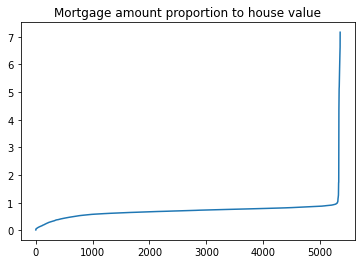

In [ ]:
HMEQ1['MORTDUE_PROP'].sort_values(ignore_index = True).plot(title = "Mortgage amount proportion to house value")

?? Some people have mortgage amounting 2X to 6X their home value. 

?? Housing market depreciated right after they bought the house

**REASON**: categorical

**JOB** categorical

In [ ]:
print(HMEQ1.groupby('REASON', dropna=False).BAD.value_counts().unstack())

BAD         0    1
REASON            
DebtCon  3183  745
HomeImp  1384  396
NaN       204   48


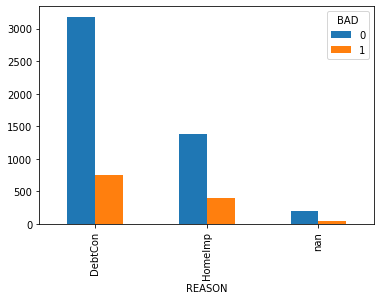

In [ ]:
HMEQ1.groupby('REASON', dropna=False).BAD.value_counts().unstack().plot.bar()

In [ ]:
df = HMEQ1.groupby('JOB', dropna=False).BAD.value_counts().unstack()
df['%default'] = df[1]/(df[0]+df[1]) * 100
print(df)

BAD         0    1   %default
JOB                          
Mgr       588  179  23.337679
Office    823  125  13.185654
Other    1834  554  23.199330
ProfExe  1064  212  16.614420
Sales      71   38  34.862385
Self      135   58  30.051813
NaN       256   23   8.243728


?? Office and ProfExe has less percentage of defaulting to loan. There jobs are relatively stable and pays well.

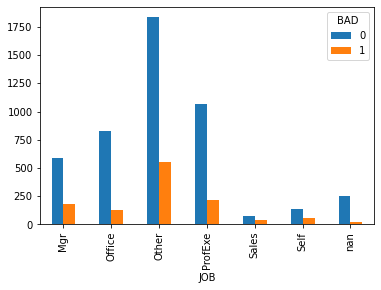

In [ ]:
HMEQ1.groupby('JOB', dropna=False).BAD.value_counts().unstack().plot.bar()

**YOJ**

Text(0, 0.5, 'count')

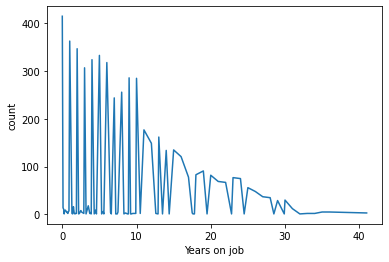

In [ ]:
ax = HMEQ1.YOJ.value_counts(dropna=False).sort_index().plot()
ax.set_xlabel("Years on job")
ax.set_ylabel("count")


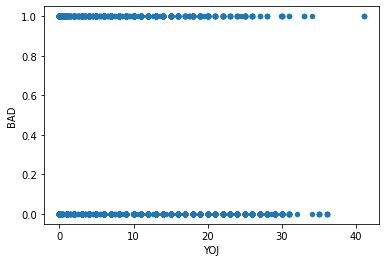

In [ ]:
HMEQ1.plot.scatter(x = 'YOJ', y='BAD')

?? Maybe I should convert YOJ form year to months scale.  CLAGE : Credit line age is in months.

But again there is not much difference between bad and good loans 

In [ ]:
HMEQ1['YOJ_Months'] = HMEQ1.YOJ * 12

**DEROG**

In [ ]:
HMEQ1.DEROG.value_counts(dropna = False)

0.0     4527
NaN      708
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

?? Most of them are 0.

?? "Derogatory Marks on Credit Record. These are very bad things that stay on your credit report for 7 years. These include bankruptcies or leins placed on your property." So does this mean 2 data points wents backrupt/ leins placed on their property 10 times within past 7 year.

**DELINQ**

In [ ]:
HMEQ1.DELINQ.value_counts(dropna = False)

0.0     4179
1.0      654
NaN      580
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
13.0       1
12.0       1
15.0       1
Name: DELINQ, dtype: int64

?? More 0s

**CLAGE**

In [ ]:
HMEQ1.CLAGE.isna().sum()

308

**NINQ**

In [ ]:
HMEQ1.NINQ.value_counts(dropna = False)

0.0     2531
1.0     1339
2.0      780
NaN      510
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
14.0       1
17.0       1
Name: NINQ, dtype: int64

**CLNO**

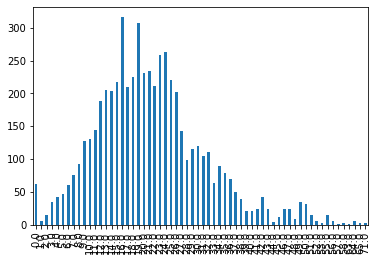

In [ ]:
HMEQ1.CLNO.value_counts().sort_index().plot.bar()

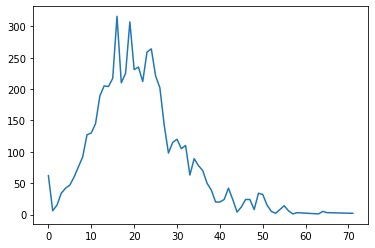

In [ ]:
HMEQ1.CLNO.value_counts().sort_index().plot()

**DEBTINC** : "Debt to Income Ratio. Take the money you spend every month and divide it by the amount of money you earn every month."

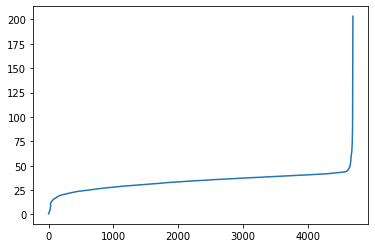

In [ ]:
HMEQ[HMEQ.DEBTINC.notna()].DEBTINC.sort_values(ignore_index = True).plot()

In [ ]:
HMEQ1[HMEQ1.DEBTINC < 2]

BAD   LOAN  MORTDUE     VALUE  ...  CLNO   DEBTINC  MORTDUE_PROP  YOJ_Months
57      1   3200  23159.0       NaN  ...   9.0  0.524499           NaN       240.0
1780    0  12100      NaN   72731.0  ...   0.0  0.720295           NaN         0.0
2088    0  13200      NaN   69139.0  ...   1.0  1.565931           NaN         0.0
2617    0  15000      NaN   68020.0  ...   0.0  1.920694           NaN        12.0
2633    0  15100      NaN   65961.0  ...   0.0  1.603508           NaN         0.0
5004    1  26500  61223.0   92255.0  ...  17.0  1.855540      0.663628        24.0
5187    1  27900  90694.0  121543.0  ...  15.0  0.838118      0.746189        60.0
5468    1  32900      NaN   55657.0  ...  15.0  1.909225           NaN        12.0
5642    1  39300      NaN   62158.0  ...  14.0  1.028931           NaN         0.0

[9 rows x 15 columns]

I would assume normal people would spend less than what they earn, so this value to be less than 1. But here, we see that there are people who spend 50 times more than what they earn. ????

Also 21.25% of the data is missing. How to handle this? Fill in using regression??


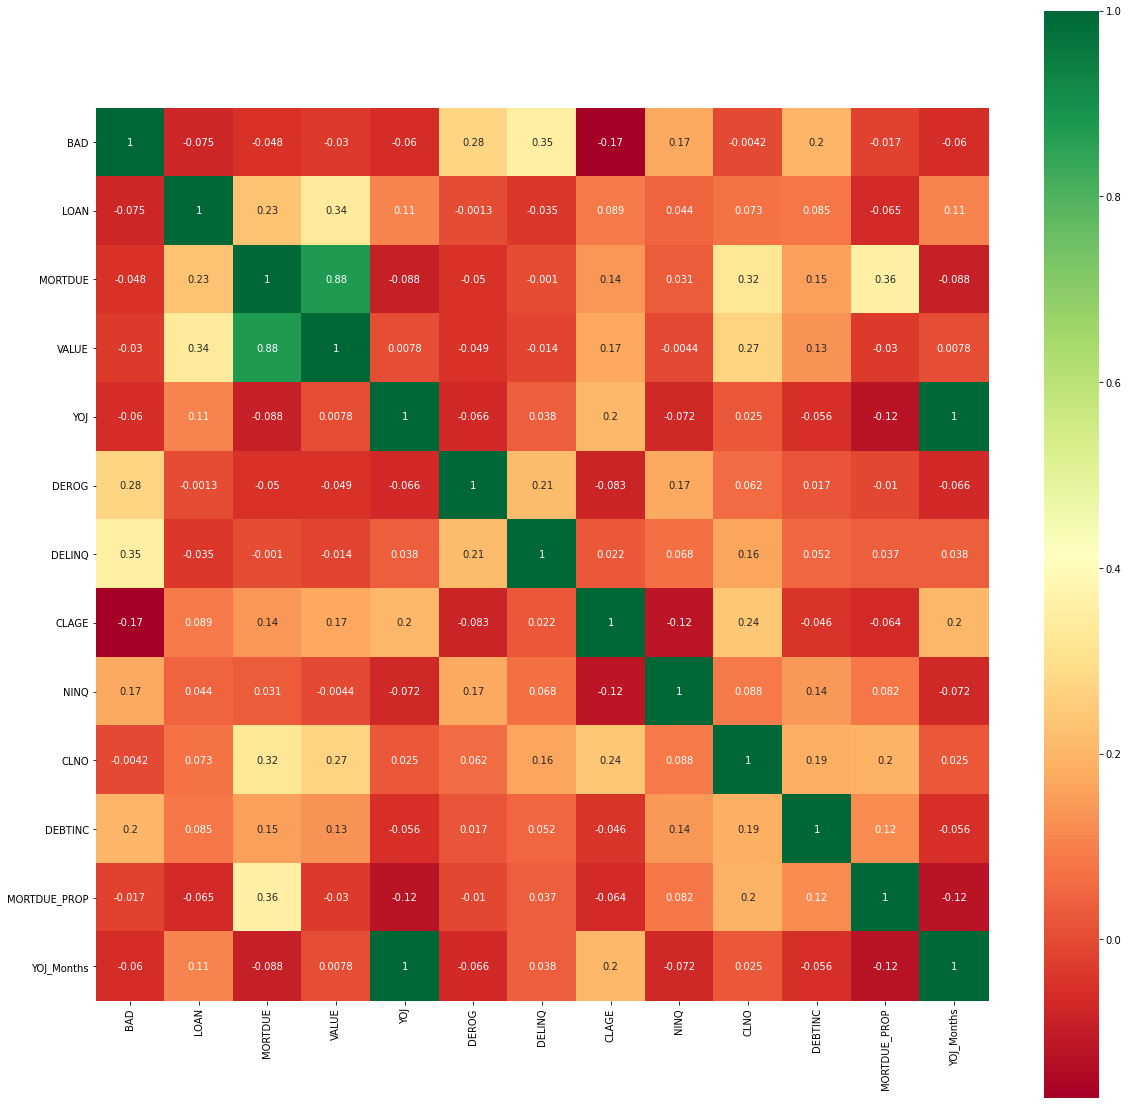

In [ ]:
plt.figure(figsize=(20,20))  
p=sns.heatmap(HMEQ1.corr(), annot=True,cmap='RdYlGn',square=True)

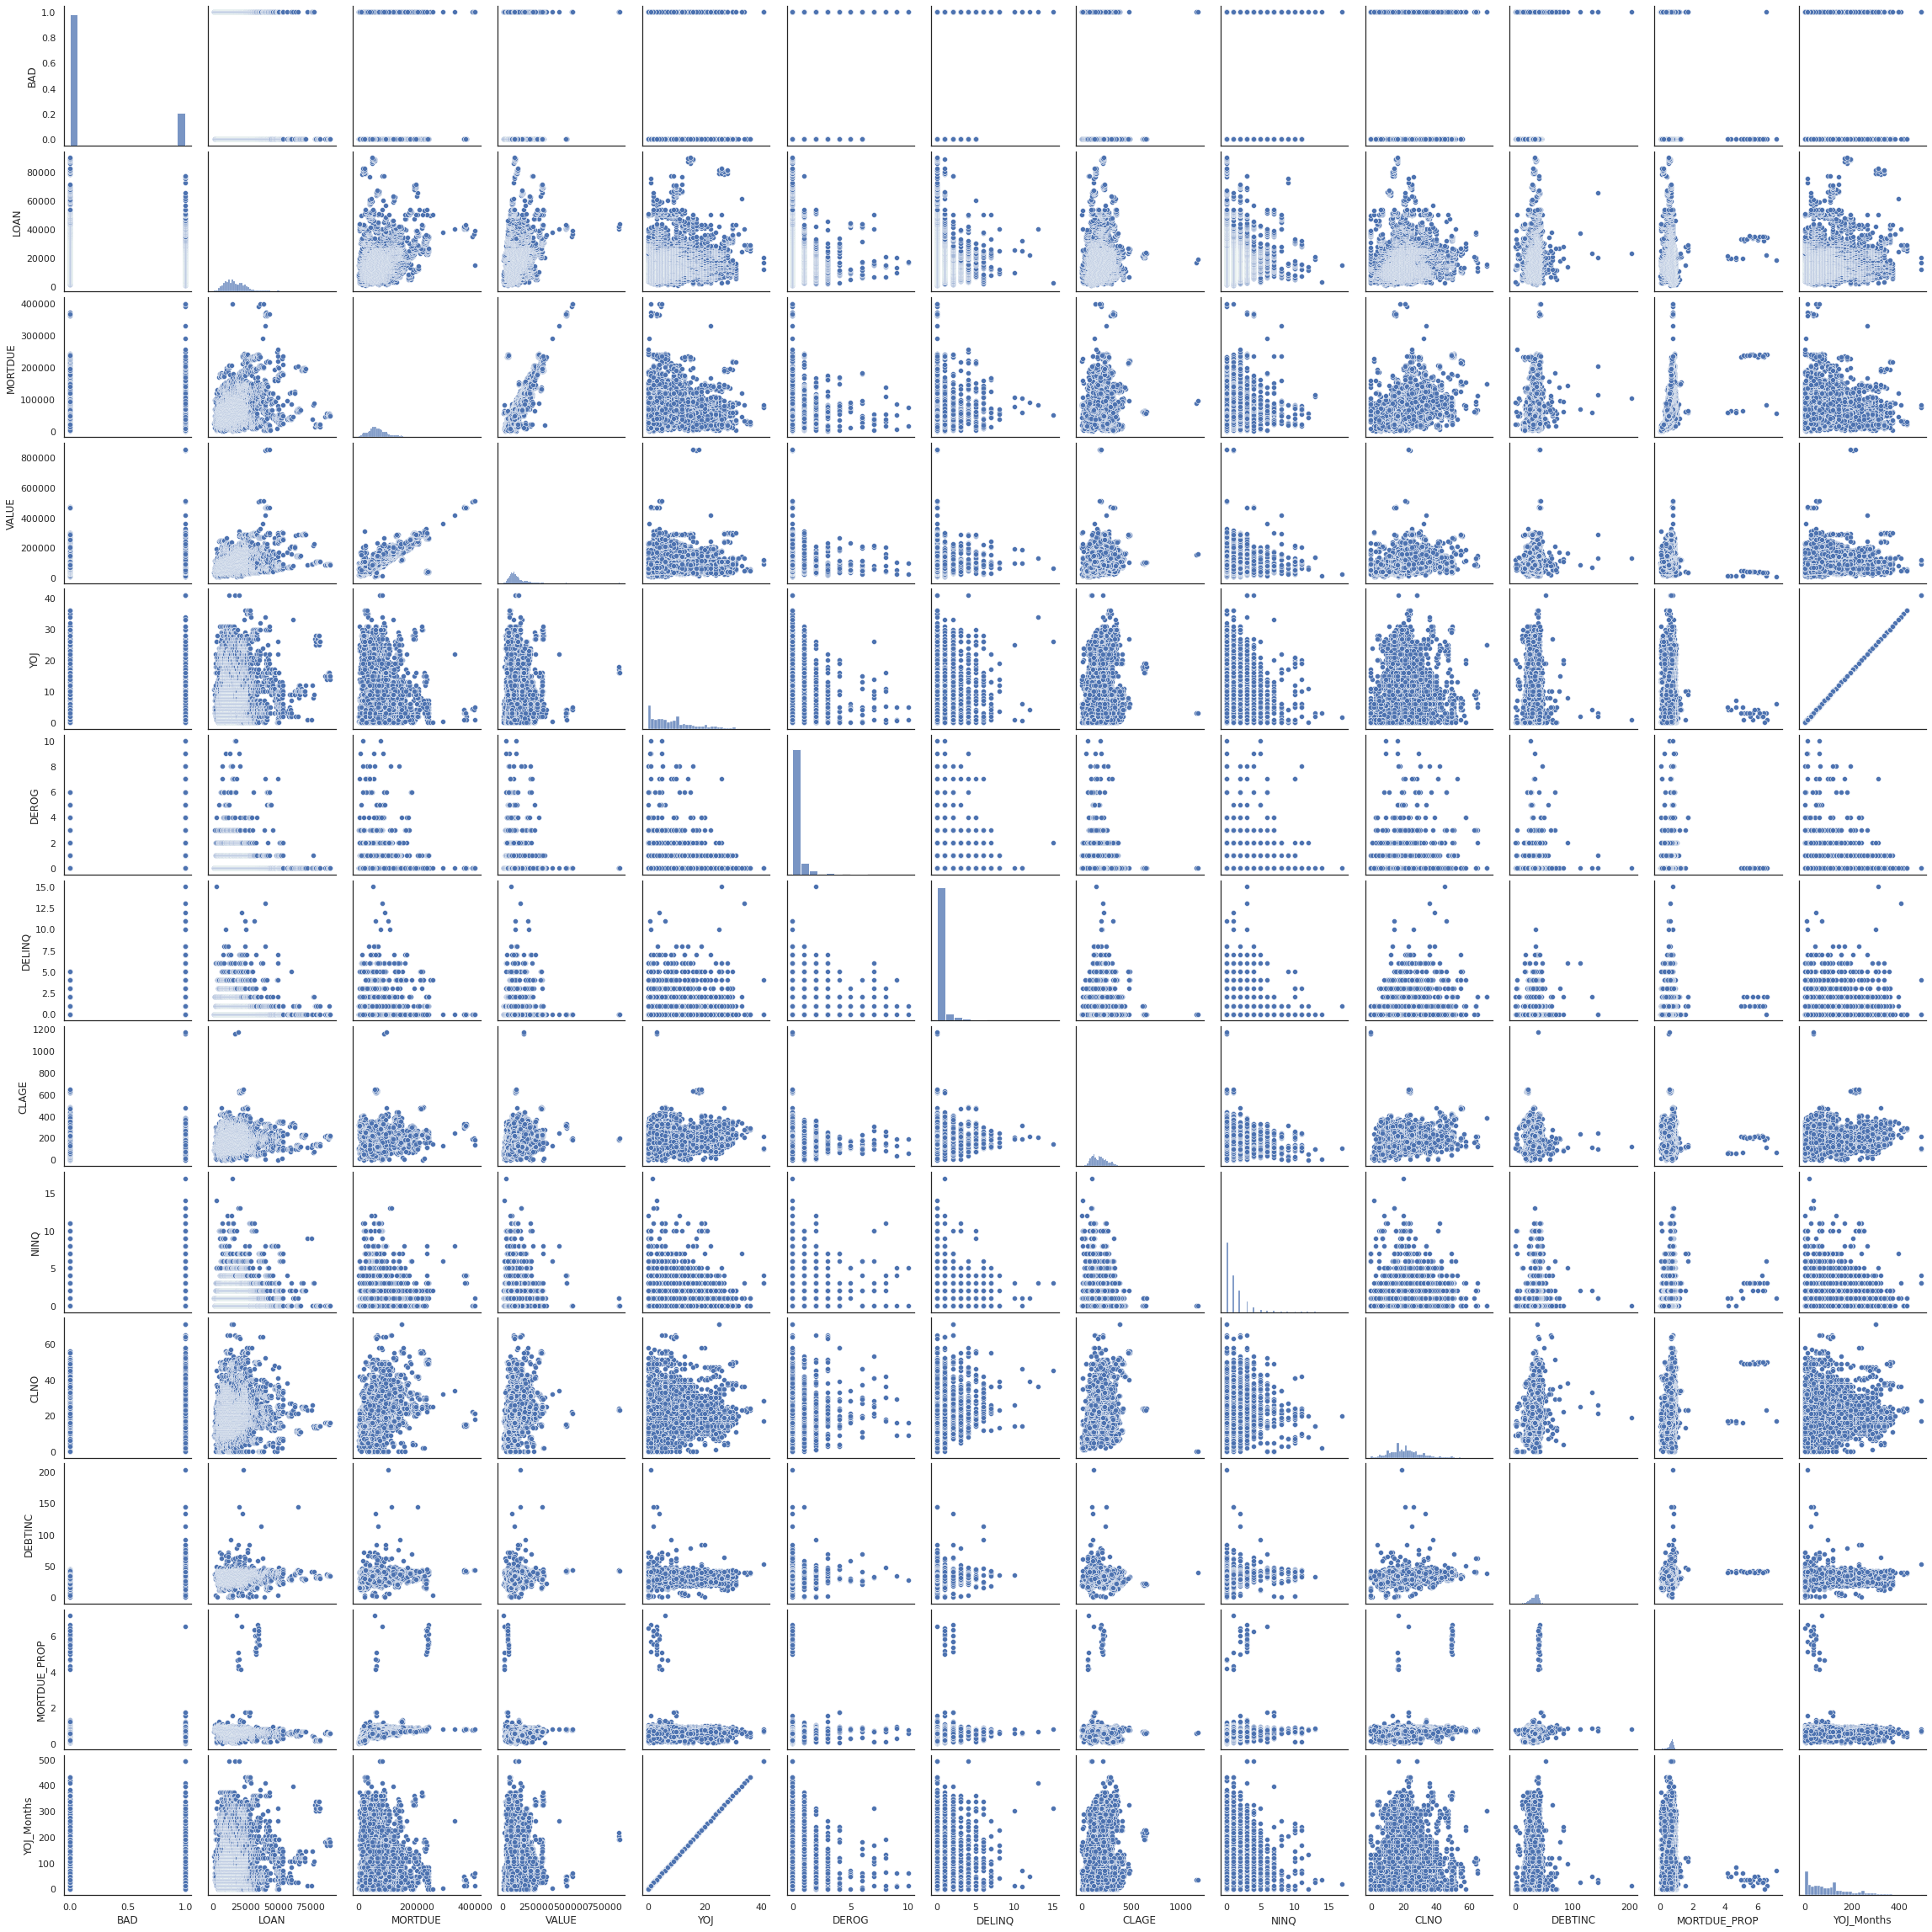

In [ ]:
sns.set(style='white')
g=sns.pairplot(HMEQ1) 
plt.show()

In [ ]:
HMEQ1.shape

(5960, 15)

In [ ]:
scale_cols = ['MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DEBTINC']
integer_cols = ['DEROG', 'DELINQ', 'NINQ', 'CLNO']
cat_cols = ['REASON', 'JOB']

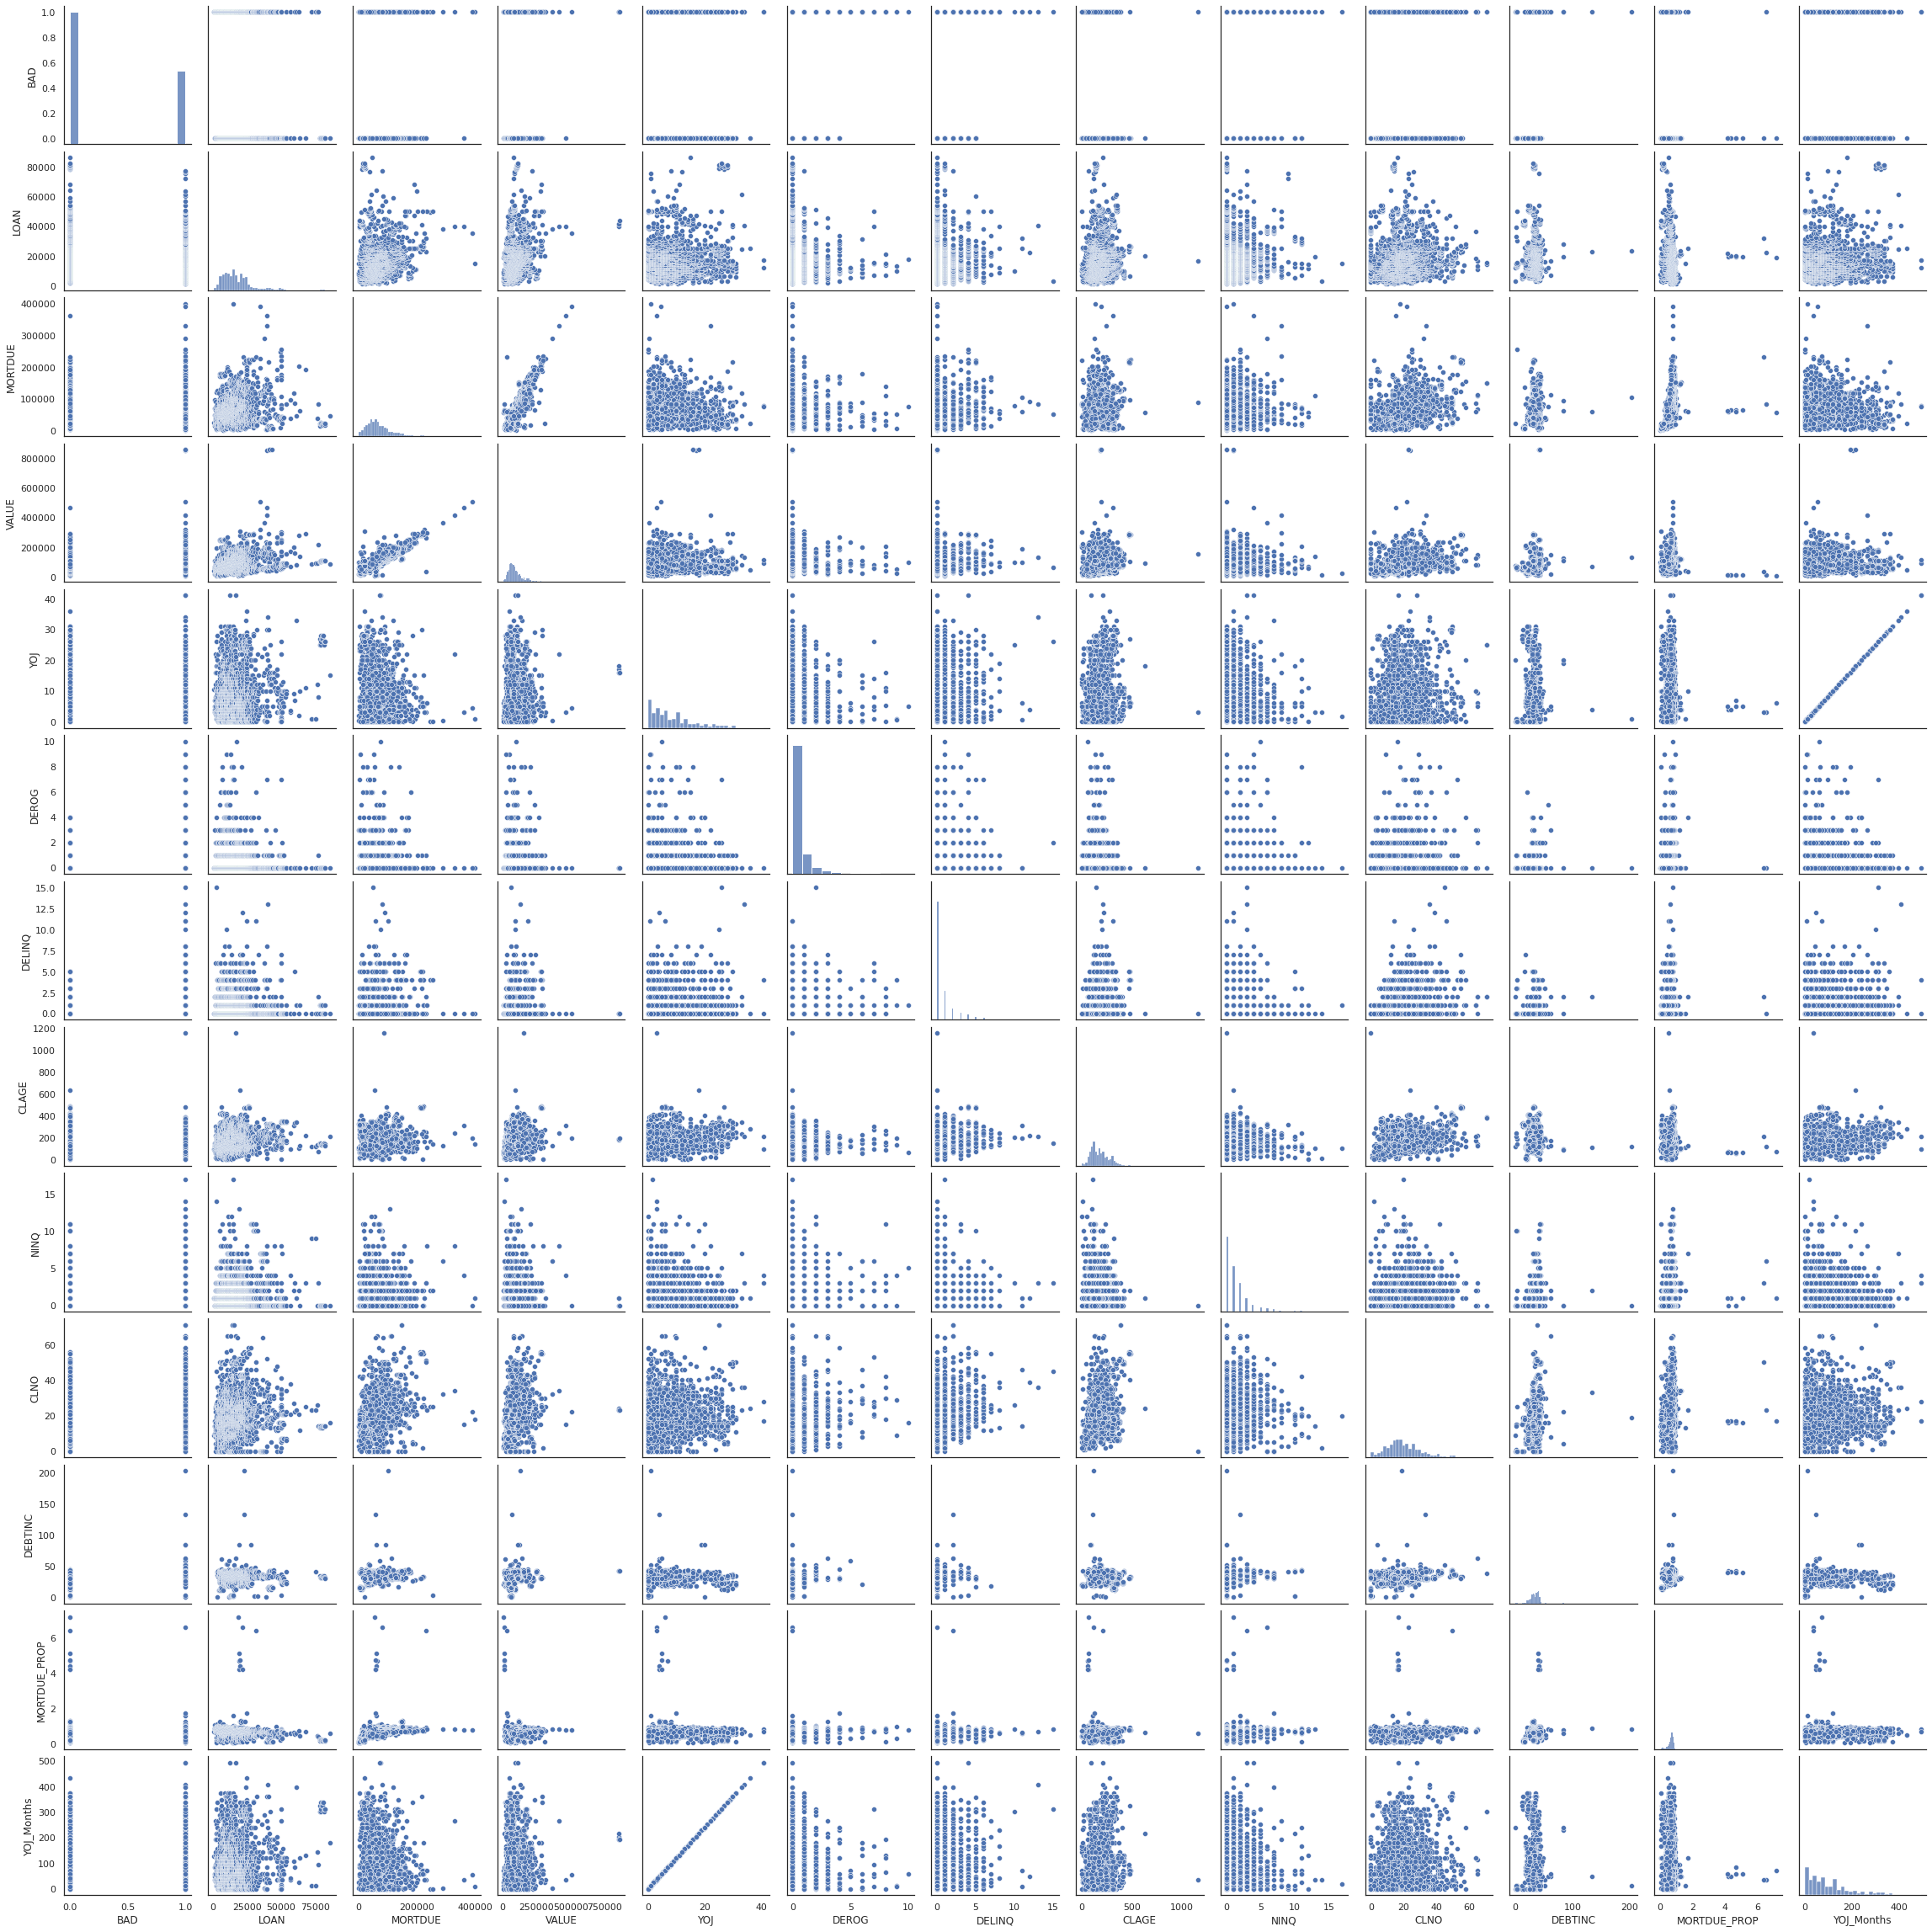

In [ ]:
sns.set(style='white')
g=sns.pairplot(HMEQ2[HMEQ2.isna().any(axis=1)]) 
plt.show()

In [ ]:
for col in scale_cols:
    HMEQ2[col]=HMEQ2[col].replace(np.nan, HMEQ2[col].mean())
  
for col in integer_cols:
    HMEQ2[col]=HMEQ2[col].replace(np.nan, HMEQ2[col].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
encode_data['REASON']=encode_data['REASON'].astype(object)
encode_data['JOB']=encode_data['JOB'].astype(object)


In [ ]:
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BAD           5706 non-null   float64
 1   LOAN          5706 non-null   float64
 2   MORTDUE       5706 non-null   float64
 3   VALUE         5706 non-null   float64
 4   REASON        5706 non-null   object 
 5   JOB           5706 non-null   object 
 6   YOJ           5706 non-null   float64
 7   DEROG         5706 non-null   float64
 8   DELINQ        5706 non-null   float64
 9   CLAGE         5706 non-null   float64
 10  NINQ          5706 non-null   float64
 11  CLNO          5706 non-null   float64
 12  DEBTINC       5706 non-null   float64
 13  MORTDUE_PROP  5706 non-null   float64
 14  YOJ_Months    5706 non-null   float64
dtypes: float64(13), object(2)
memory usage: 668.8+ KB


In [ ]:
# Creating Dummy variables before modeling'
pd.options.display.max_columns =30
cat_vars=encode_data[[ 'JOB']]

cat_vars_onehot=pd.get_dummies(cat_vars)
print(cat_vars_onehot.head())

   JOB_0.0  JOB_1.0  JOB_2.0  JOB_3.0  JOB_4.0  JOB_5.0
0        0        0        1        0        0        0
1        0        0        1        0        0        0
2        0        0        1        0        0        0
3        0        1        0        0        0        0
4        0        0        1        0        0        0


In [ ]:
# Mgr = 0
# Office = 1
# Other = 2
# ProfExe = 3
# Sales = 4
# Self = 5 

cat_vars_onehot.columns

Index(['JOB_0.0', 'JOB_1.0', 'JOB_2.0', 'JOB_3.0', 'JOB_4.0', 'JOB_5.0'], dtype='object')

In [ ]:
# renaming variables to be more intuitive
cat_vars_onehot.columns = ['JOB_Mgr', 'JOB_Off', 'JOB_Oth', 'JOB_PEx', 'JOB_Sal', 'JOB_Sel'] 

In [ ]:
cat_vars_onehot.head()

JOB_Mgr  JOB_Off  JOB_Oth  JOB_PEx  JOB_Sal  JOB_Sel
0        0        0        1        0        0        0
1        0        0        1        0        0        0
2        0        0        1        0        0        0
3        0        1        0        0        0        0
4        0        0        1        0        0        0

In [ ]:
HMEQ3 = pd.concat([encode_data, cat_vars_onehot], axis=1)

In [ ]:
HMEQ3.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'MORTDUE_PROP',
       'YOJ_Months', 'JOB_Mgr', 'JOB_Off', 'JOB_Oth', 'JOB_PEx', 'JOB_Sal',
       'JOB_Sel'],
      dtype='object')

In [ ]:
# dropping columns that are imputed or turned dummies 
cols = ['JOB', 'MORTDUE', 'VALUE', 'JOB_Mgr']
HMEQ4 = HMEQ3.drop(columns = cols)

# Modeling

0.0    4571
1.0    1135
Name: BAD, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


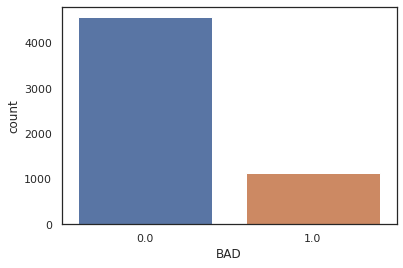

In [ ]:
# print the count of each class from the target vatiables
print(HMEQ4.BAD.value_counts())

# plot the count of each class from the target vatiables
sns.countplot(HMEQ4.BAD)

## Train test split

In [ ]:
HMEQ4.columns

Index(['BAD', 'LOAN', 'REASON', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'MORTDUE_PROP', 'YOJ_Months', 'JOB_Off', 'JOB_Oth',
       'JOB_PEx', 'JOB_Sal', 'JOB_Sel'],
      dtype='object')

In [ ]:

from  sklearn.model_selection import train_test_split

# X = HMEQ4.loc[:, HMEQ4.columns != 'BAD']
# y = HMEQ4.loc[:, HMEQ4.columns == 'BAD']

cols = ['LOAN', 'REASON', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'MORTDUE_PROP', 'YOJ_Months', 'JOB_Off', 'JOB_Oth',
       'JOB_PEx', 'JOB_Sal', 'JOB_Sel']

X = HMEQ4[cols]
y = HMEQ4['BAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Random Over Sampler 

In [ ]:
# import the Random Over Sampler object.
from imblearn.over_sampling import RandomOverSampler

# create the object.
over_sampler = RandomOverSampler()

# fit the object to the training data.
X_train_over, y_train_over = over_sampler.fit_sample(X_train, y_train)

len(X_train_over)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


7312

In [ ]:
pd.Series(y_train_over).value_counts()

1.0    3656
0.0    3656
dtype: int64

In [ ]:
# Recursive Feature Elimination 
# HMEQ4_vars=HMEQ4.columns.values.tolist()
#y=['BAD']
#X=[i for i in HMEQ4_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_over, y_train_over.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def logisticRegression(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

  
def confusion_matrix(model, X_test, y_test):

  predictions = model.predict(X_test)
  print(predictions)

  # Use score method to get accuracy of model
  accuracy = model.score(X_test, y_test)
  print(accuracy)

  cm = metrics.confusion_matrix(y_test, predictions)
  print(cm)

  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
  plt.title(all_sample_title, size = 15);
  plt.show()


def draw_ROC (model,  _data, _label):

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(_label))]

    # predict probabilities
    lr_probs = model.predict_proba(_data)
    
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(_label, ns_probs)
    lr_auc = roc_auc_score(_label, lr_probs)
    # summarize scores
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(_label, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(_label, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0. 0. 1. ... 0. 1. 0.]
0.8345008756567426
[[894  21]
 [168  59]]


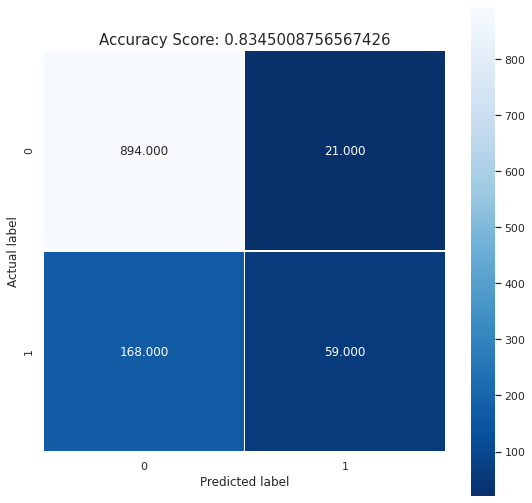

Logistic: ROC AUC=0.780


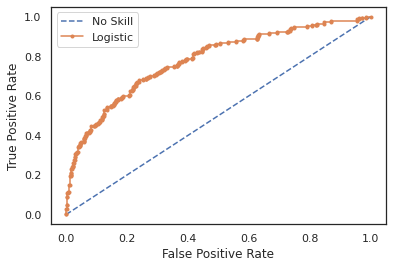

In [ ]:
LR = logisticRegression(X_train, y_train)

confusion_matrix(LR, X_test, y_test)

draw_ROC(LR, X_test, y_test)

## SMOTE Over sampling

In [ ]:
# import the SMOTETomek
from imblearn.over_sampling import SMOTE

# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train.values.ravel())

len(X_train_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


7312

In [ ]:
# Recursive Feature Elimination 
# HMEQ4_vars=HMEQ4.columns.values.tolist()
#y=['BAD']
#X=[i for i in HMEQ4_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_smote, y_train_smote.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0. 0. 1. ... 1. 1. 0.]
0.7539404553415061
[[707 208]
 [ 73 154]]


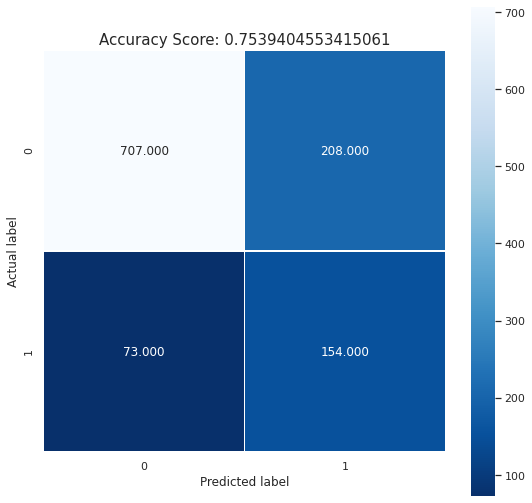

Logistic: ROC AUC=0.796


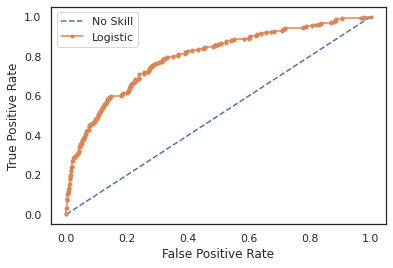

In [ ]:
LR = logisticRegression(X_train_smote, y_train_smote)

confusion_matrix(LR, X_test, y_test)

draw_ROC(LR, X_test, y_test)